In [1]:
#importando as bibliotecas
import pandas as pd  #biblioteca utilizada para criar os dataframes
import numpy as np  #biblioteca utilizada para trabalhar com vetores ou matrizes
import matplotlib.pyplot as plt #biblioteca utilizada para construção de gráficos
from sklearn.cluster import KMeans #biblioteca utilizada para a construção K-means
from sklearn.decomposition import PCA #biblioteca utilizada para a construção do PCA
from sklearn.preprocessing import StandardScaler #biblioteca utilizada para a normalização dos dados
import seaborn as sns #biblioteca utilizada para o plot dos gráficos de forma mais "bonita"

In [ ]:
#Para fins didáticos foi utilizado o armazenamento dos arquivos no google drive, para acessar os mesmos
#É necessário montar o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Lendo os dados do arquivo mercado.csv para montar o dataFrame
df_mercado = pd.read_csv('/content/drive/MyDrive/database/mercado.csv',delimiter=';')

In [4]:
df_mercado.head()

,Id,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9,...,product_11,product_12,product_13,product_14,product_15,product_16,product_17,product_18,product_19,product_20
0,0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,...,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Neste momento não foi possível ler o arquivo xls, devido a versão não ser compátível, então vamos instalar uma versão nova!***
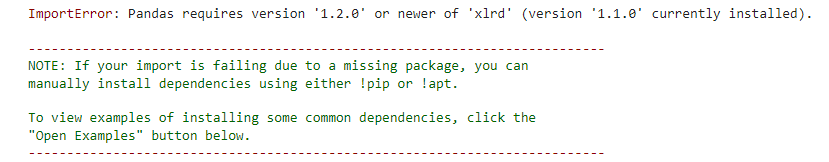

In [5]:
#Instalando a dependência xlrd.
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 4.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [6]:
#Após instalação da depedência xlrd é possível ler os dados do arquivo compras.xls para montar o dataFrame
df_compras = pd.read_excel('/content/drive/MyDrive/database/compras.xls')

In [7]:
df_compras.head()

,cod_cliente,cod_produto,qtd_produto,valor_unitario,valor_total_compra
0,1,1011.0,3,5.99,17.97
1,2,1032.0,4,9.99,39.96
2,3,1049.0,2,5.99,NaN
3,4,1021.0,4,3.99,15.96
4,5,1001.0,4,22.00,88.00


In [8]:
df_compras.describe()

,cod_cliente,cod_produto,qtd_produto,valor_unitario,valor_total_compra
count,3000.000000,2990.000000,3000.000000,2995.000000,2979.000000
mean,1500.500000,1043.261873,2.507667,8.487830,21.173031
std,866.169729,24.969114,1.119386,10.772478,30.504863
min,1.000000,1000.000000,1.000000,1.250000,1.250000
25%,750.750000,1022.000000,1.000000,3.500000,6.000000
50%,1500.500000,1043.000000,3.000000,4.990000,11.980000
75%,2250.250000,1065.000000,4.000000,8.990000,22.500000
max,3000.000000,1086.000000,4.000000,64.990000,259.960000


In [9]:
df_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cod_cliente         3000 non-null   int64  
 1   cod_produto         2990 non-null   float64
 2   qtd_produto         3000 non-null   int64  
 3   valor_unitario      2995 non-null   float64
 4   valor_total_compra  2979 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 117.3 KB


***Analisando dados ausêntes para tomada de decisão***

Nesta etapa é possível seguir dois caminhos: Tratar os dados ausentes ou Removê-los.
Para fins didáticos vamos remover os dados ausentes!

In [10]:
#analisando dados ausentes
df_compras.isnull().sum()

cod_cliente            0
cod_produto           10
qtd_produto            0
valor_unitario         5
valor_total_compra    21
dtype: int64

In [11]:
#Removendo dados ausentes para fins didaticos esta ação trará somente o valor do wcss correto, os demais dados deverão ser tratados conforme análise a seguir
df_compras.dropna(subset=['cod_produto','valor_unitario','valor_total_compra'], inplace=True)


In [ ]:
#Tratando os dados ausentes da coluna valor_total_compra. Após análise do dataFrame, é possível identificar que não é preciso remover os dados ausentes porque
#eles determinam os valores corretos dos clusters conforme solicitação do enunciado
# df_compras.dropna(subset=['cod_produto','valor_unitario'], inplace=True) --Descomentar essa linha e comentar a execução anterior.

In [12]:
#alterando tipo de dados do codigo do produto para manter integridade
df_compras.loc[df_compras['valor_total_compra'].isnull(), 
    'valor_total_compra'] = df_compras['qtd_produto'] * df_compras['valor_unitario']
df_compras.isnull().sum()

cod_cliente           0
cod_produto           0
qtd_produto           0
valor_unitario        0
valor_total_compra    0
dtype: int64

***Coletando de dados dos clientes***

1.   Lendo arquivo do tipo json
2.   Convertendo objeto em DataFrame
3.   Tratando os dados para melhor entendimento dos resultados





In [13]:
#Lendo os dados do arquivo clientes.json para montar o dataFrame
df = pd.read_json('/content/drive/MyDrive/database/clientes.json')
bn = pd.DataFrame(df.cliente.values.tolist())
df_clientes = pd.DataFrame.from_records(bn)

In [14]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   cod_cliente   3000 non-null   int64
 1   sexo          3000 non-null   int64
 2   idade         3000 non-null   int64
 3   qtd_filhos    3000 non-null   int64
 4   estado_civil  3000 non-null   int64
 5   cod_estado    3000 non-null   int64
 6   hipertenso    3000 non-null   int64
 7   diabetes      3000 non-null   int64
dtypes: int64(8)
memory usage: 187.6 KB


In [15]:
df_clientes.isnull().sum()

cod_cliente     0
sexo            0
idade           0
qtd_filhos      0
estado_civil    0
cod_estado      0
hipertenso      0
diabetes        0
dtype: int64

In [16]:
#substituindo valores de sexo, para melhor interpretação e análise dos dados
# 0 → Feminino 1 → Masculino
df_clientes['sexo'] = df_clientes['sexo'].replace(
    to_replace = [0,1],
    value = ['feminino','masculino']
)

In [17]:
#substituindo valores do estado_civil, para melhor interpretação e análise dos dados
# 0 → solteiro 1 → casado 2 → viuvo 3 → divorciado
df_clientes['estado_civil'] = df_clientes['estado_civil'].replace(
    to_replace = [0,1,2,3],
    value = ['solteiro(a)','casado(a)','viuvo(a)','divorciado(a)']
)

In [18]:
#substituindo valores de hipertenção, para melhor interpretação e análise dos dados
# 0 → não hipertenso 1 → hipertenso
df_clientes.rename(columns={'hipertenso':'hipertensao'}, inplace=True)
df_clientes['hipertensao'] = df_clientes['hipertensao'].replace(
    to_replace = [0,1],
    value = ['nao hipertenso','hipertenso']
)

In [19]:
#substituindo valores de diabetes, para melhor interpretação e análise dos dados
# 0 → não diabetico 1 → diabetico
df_clientes['diabetes'] = df_clientes['diabetes'].replace(
    to_replace = [0,1],
    value = ['nao diabetico','diabetico']
)

In [20]:
df_clientes['sexo'] = df_clientes['sexo'].astype(str)
df_clientes['estado_civil'] = df_clientes['estado_civil'].astype(str)
df_clientes['hipertensao'] = df_clientes['hipertensao'].astype(str)
df_clientes['diabetes'] = df_clientes['diabetes'].astype(str)

In [21]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cod_cliente   3000 non-null   int64 
 1   sexo          3000 non-null   object
 2   idade         3000 non-null   int64 
 3   qtd_filhos    3000 non-null   int64 
 4   estado_civil  3000 non-null   object
 5   cod_estado    3000 non-null   int64 
 6   hipertensao   3000 non-null   object
 7   diabetes      3000 non-null   object
dtypes: int64(4), object(4)
memory usage: 187.6+ KB


***Realizando a coleta de dados via web scraping***

In [22]:
#Instalando bibliotecas
from bs4 import BeautifulSoup
import requests

In [23]:
response = requests.get("https://profleandrolessa.wordpress.com/exercicio-de-coleta-de-dados")

In [24]:
soup = BeautifulSoup(response.content, "html.parser")

In [25]:
#Extraindo as colunas da Tabela
tabelas = soup.find_all('tr')

In [26]:
len(tabelas)

88

In [27]:
resultado = tabelas[:88]
resultado

[<tr><td>cod_produto</td><td>nome_produto</td><td>cod_classe_produto</td><td>classe_produto</td><td>valor</td></tr>,
 <tr><td>1000</td><td>Sabão em pó</td><td>1</td><td>Produtos de Limpeza</td><td>9,9</td></tr>,
 <tr><td>1001</td><td>Amaciante</td><td>1</td><td>Produtos de Limpeza</td><td>22</td></tr>,
 <tr><td>1002</td><td>Detergente</td><td>1</td><td>Produtos de Limpeza</td><td>1,99</td></tr>,
 <tr><td>1003</td><td>Água sanitária</td><td>1</td><td>Produtos de Limpeza</td><td>12</td></tr>,
 <tr><td>1004</td><td>Esponja de aço</td><td>1</td><td>Produtos de Limpeza</td><td>4</td></tr>,
 <tr><td>1005</td><td>Buchinha de pia</td><td>1</td><td>Produtos de Limpeza</td><td>2,5</td></tr>,
 <tr><td>1006</td><td>Sabão em pedra</td><td>1</td><td>Produtos de Limpeza</td><td>6</td></tr>,
 <tr><td>1007</td><td>Sabonete</td><td>1</td><td>Produtos de Limpeza</td><td>1,25</td></tr>,
 <tr><td>1008</td><td>Shampo</td><td>1</td><td>Produtos de Limpeza</td><td>8,5</td></tr>,
 <tr><td>1009</td><td>Condicio

In [28]:
print(resultado)

[<tr><td>cod_produto</td><td>nome_produto</td><td>cod_classe_produto</td><td>classe_produto</td><td>valor</td></tr>, <tr><td>1000</td><td>Sabão em pó</td><td>1</td><td>Produtos de Limpeza</td><td>9,9</td></tr>, <tr><td>1001</td><td>Amaciante</td><td>1</td><td>Produtos de Limpeza</td><td>22</td></tr>, <tr><td>1002</td><td>Detergente</td><td>1</td><td>Produtos de Limpeza</td><td>1,99</td></tr>, <tr><td>1003</td><td>Água sanitária</td><td>1</td><td>Produtos de Limpeza</td><td>12</td></tr>, <tr><td>1004</td><td>Esponja de aço</td><td>1</td><td>Produtos de Limpeza</td><td>4</td></tr>, <tr><td>1005</td><td>Buchinha de pia</td><td>1</td><td>Produtos de Limpeza</td><td>2,5</td></tr>, <tr><td>1006</td><td>Sabão em pedra</td><td>1</td><td>Produtos de Limpeza</td><td>6</td></tr>, <tr><td>1007</td><td>Sabonete</td><td>1</td><td>Produtos de Limpeza</td><td>1,25</td></tr>, <tr><td>1008</td><td>Shampo</td><td>1</td><td>Produtos de Limpeza</td><td>8,5</td></tr>, <tr><td>1009</td><td>Condicionador</td>

In [29]:
rows = []
for produto in soup.find_all('tr')[1:] :
    # Get all the cells in the row.
    cells = produto.find_all("td")
    
    # The information we need is the text between tags.
    name_tag = cells[0].find("cod_produto") or cells[0]
    cod_produto = name_tag.text

    name_tag = cells[1].find("nome_produto") or cells[1]
    nome_produto = name_tag.text
    
    name_tag = cells[2].find("cod_classe_produto") or cells[2]
    cod_classe_produto = name_tag.text

    name_tag = cells[3].find("classe_produto") or cells[3]
    classe_produto = name_tag.text

    name_tag = cells[4].find("valor") or cells[4]
    valor = name_tag.text
    # Append this data.
    rows.append({
        "cod_produto": cod_produto,
        "nome_produto": nome_produto,
        "cod_classe_produto": cod_classe_produto,
        "classe_produto": classe_produto,
        "valor": valor
    })

In [30]:
df_produtos = pd.DataFrame.from_dict(rows)

In [31]:
df_produtos.head()

,cod_produto,nome_produto,cod_classe_produto,classe_produto,valor
0,1000,Sabão em pó,1,Produtos de Limpeza,"9,9"
1,1001,Amaciante,1,Produtos de Limpeza,22
2,1002,Detergente,1,Produtos de Limpeza,"1,99"
3,1003,Água sanitária,1,Produtos de Limpeza,12
4,1004,Esponja de aço,1,Produtos de Limpeza,4


In [32]:
#tratando dados de valores para trabalhar com padrão americano
df_produtos['valor'] = df_produtos['valor'].replace(
    to_replace = ',',
    value = '.',
    regex=True
)

In [33]:
#alterando tipo de dados para manter integridade
df_produtos['cod_produto'] = df_produtos['cod_produto'].astype({'cod_produto':np.int64})
df_produtos['nome_produto'] = df_produtos['nome_produto'].astype(str)
df_produtos['cod_classe_produto'] = df_produtos['cod_classe_produto'].astype({'cod_classe_produto':np.int64})
df_produtos['classe_produto'] = df_produtos['classe_produto'].astype(str)
df_produtos['valor'] = df_produtos['valor'].astype({'valor':np.float64})

In [35]:
#Lendo os dados do arquivo estados.txt para montar o dataFrame
df_estados = pd.read_csv('/content/drive/MyDrive/database/estados.txt', delimiter='|', encoding='latin-1')

In [36]:
df_estados.head()

,codigo_estado,nome_estado,sgl_estado
0,1,Acre,AC
1,2,Alagoas,AL
2,3,Amapá,AP
3,4,Amazonas,AM
4,5,Bahia,BA


In [37]:
#renomeando coluna codigo_estado para manter integridade dos dados e relacionamentos
df_estados.rename(columns={'codigo_estado':'cod_estado'}, inplace=True)
df_estados.head()

,cod_estado,nome_estado,sgl_estado
0,1,Acre,AC
1,2,Alagoas,AL
2,3,Amapá,AP
3,4,Amazonas,AM
4,5,Bahia,BA


In [38]:
df_clientes.head()

,cod_cliente,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertensao,diabetes
0,1,masculino,26,2,divorciado(a),13,nao hipertenso,diabetico
1,2,masculino,58,0,viuvo(a),2,nao hipertenso,nao diabetico
2,3,masculino,63,1,divorciado(a),11,hipertenso,diabetico
3,4,masculino,58,2,viuvo(a),11,hipertenso,diabetico
4,5,feminino,70,0,casado(a),5,nao hipertenso,diabetico


In [39]:
df_compras.head()

,cod_cliente,cod_produto,qtd_produto,valor_unitario,valor_total_compra
0,1,1011.0,3,5.99,17.97
1,2,1032.0,4,9.99,39.96
3,4,1021.0,4,3.99,15.96
4,5,1001.0,4,22.00,88.00
5,6,1003.0,2,12.00,24.00


***Junções entre os dados coletados***

Nessa etapa vamos realizar o merge entre os dados que realizamos a coleta

In [40]:
#fazendo o merge entre cliente e estado
df_cli_uf = pd.merge(df_clientes, df_estados, on='cod_estado')
df_cli_uf.sort_values('cod_cliente')

,cod_cliente,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertensao,diabetes,nome_estado,sgl_estado
0,1,masculino,26,2,divorciado(a),13,nao hipertenso,diabetico,Minas Gerais,MG
118,2,masculino,58,0,viuvo(a),2,nao hipertenso,nao diabetico,Alagoas,AL
233,3,masculino,63,1,divorciado(a),11,hipertenso,diabetico,Mato Grosso,MT
234,4,masculino,58,2,viuvo(a),11,hipertenso,diabetico,Mato Grosso,MT
342,5,feminino,70,0,casado(a),5,nao hipertenso,diabetico,Bahia,BA
...,...,...,...,...,...,...,...,...,...,...
2133,2996,masculino,63,1,viuvo(a),12,nao hipertenso,diabetico,Mato Grosso do Sul,MS
913,2997,masculino,35,0,viuvo(a),7,nao hipertenso,nao diabetico,Distrito Federal,DF
340,2998,masculino,35,2,solteiro(a),11,nao hipertenso,nao diabetico,Mato Grosso,MT
2462,2999,masculino,20,0,solteiro(a),20,hipertenso,nao diabetico,Rio Grande do Norte,RN


In [41]:
#fazendo o merge entre produto e compra
df_compra_prod = pd.merge(df_produtos, df_compras, on='cod_produto')
df_compra_prod.sort_values('cod_cliente')

,cod_produto,nome_produto,cod_classe_produto,classe_produto,valor,cod_cliente,qtd_produto,valor_unitario,valor_total_compra
374,1011,Lustra móveis,1,Produtos de Limpeza,5.99,1,3,5.99,17.97
1050,1032,Café,3,Alimentação,9.99,2,4,9.99,39.96
698,1021,Leite integral litro,2,Bebidas,3.99,4,4,3.99,15.96
36,1001,Amaciante,1,Produtos de Limpeza,22.00,5,4,22.00,88.00
96,1003,Água sanitária,1,Produtos de Limpeza,12.00,6,2,12.00,24.00
...,...,...,...,...,...,...,...,...,...
1591,1046,Goiabada,3,Alimentação,4.99,2996,4,4.99,19.96
730,1021,Leite integral litro,2,Bebidas,3.99,2997,1,3.99,3.99
2599,1075,Queijo Minas,5,Carnes e Frios,35.00,2998,4,35.00,140.00
95,1002,Detergente,1,Produtos de Limpeza,1.99,2999,3,1.99,5.97


In [42]:
#fazendo o merge entre os dois novos dataframe para formar uma base unica
df_compra_por_cliente = pd.merge(df_cli_uf, df_compra_prod, on='cod_cliente')
df_compra_por_cliente.sort_values('cod_cliente')

,cod_cliente,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertensao,diabetes,nome_estado,sgl_estado,cod_produto,nome_produto,cod_classe_produto,classe_produto,valor,qtd_produto,valor_unitario,valor_total_compra
0,1,masculino,26,2,divorciado(a),13,nao hipertenso,diabetico,Minas Gerais,MG,1011,Lustra móveis,1,Produtos de Limpeza,5.99,3,5.99,17.97
116,2,masculino,58,0,viuvo(a),2,nao hipertenso,nao diabetico,Alagoas,AL,1032,Café,3,Alimentação,9.99,4,9.99,39.96
229,4,masculino,58,2,viuvo(a),11,hipertenso,diabetico,Mato Grosso,MT,1021,Leite integral litro,2,Bebidas,3.99,4,3.99,15.96
336,5,feminino,70,0,casado(a),5,nao hipertenso,diabetico,Bahia,BA,1001,Amaciante,1,Produtos de Limpeza,22.00,4,22.00,88.00
445,6,feminino,30,2,solteiro(a),25,hipertenso,nao diabetico,São Paulo,SP,1003,Água sanitária,1,Produtos de Limpeza,12.00,2,12.00,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,2996,masculino,63,1,viuvo(a),12,nao hipertenso,diabetico,Mato Grosso do Sul,MS,1046,Goiabada,3,Alimentação,4.99,4,4.99,19.96
903,2997,masculino,35,0,viuvo(a),7,nao hipertenso,nao diabetico,Distrito Federal,DF,1021,Leite integral litro,2,Bebidas,3.99,1,3.99,3.99
334,2998,masculino,35,2,solteiro(a),11,nao hipertenso,nao diabetico,Mato Grosso,MT,1075,Queijo Minas,5,Carnes e Frios,35.00,4,35.00,140.00
2434,2999,masculino,20,0,solteiro(a),20,hipertenso,nao diabetico,Rio Grande do Norte,RN,1002,Detergente,1,Produtos de Limpeza,1.99,3,1.99,5.97


In [43]:
df_compra_por_cliente.reset_index(drop=True)

,cod_cliente,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertensao,diabetes,nome_estado,sgl_estado,cod_produto,nome_produto,cod_classe_produto,classe_produto,valor,qtd_produto,valor_unitario,valor_total_compra
0,1,masculino,26,2,divorciado(a),13,nao hipertenso,diabetico,Minas Gerais,MG,1011,Lustra móveis,1,Produtos de Limpeza,5.99,3,5.99,17.97
1,64,masculino,51,1,divorciado(a),13,nao hipertenso,diabetico,Minas Gerais,MG,1056,Tomate,4,Hortifruti,3.75,2,3.75,7.50
2,155,feminino,38,2,viuvo(a),13,hipertenso,diabetico,Minas Gerais,MG,1026,Extrato de tomate,3,Alimentação,2.00,4,2.00,8.00
3,228,masculino,53,2,divorciado(a),13,nao hipertenso,nao diabetico,Minas Gerais,MG,1065,Uva,4,Hortifruti,5.99,1,5.99,5.99
4,265,feminino,18,0,solteiro(a),13,nao hipertenso,nao diabetico,Minas Gerais,MG,1002,Detergente,1,Produtos de Limpeza,1.99,3,1.99,5.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,2871,masculino,23,2,divorciado(a),14,nao hipertenso,diabetico,Pará,PA,1072,Salsa,4,Hortifruti,1.50,4,1.50,6.00
2960,2882,masculino,59,2,divorciado(a),14,hipertenso,diabetico,Pará,PA,1048,Óleo de cozinha,3,Alimentação,8.99,2,8.99,17.98
2961,2944,masculino,42,2,casado(a),14,hipertenso,diabetico,Pará,PA,1037,Farinha de mandioca,3,Alimentação,3.45,4,3.45,13.80
2962,2960,feminino,23,0,solteiro(a),14,nao hipertenso,nao diabetico,Pará,PA,1037,Farinha de mandioca,3,Alimentação,3.45,1,3.45,3.45


In [44]:
df_compra_por_cliente.head()

,cod_cliente,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertensao,diabetes,nome_estado,sgl_estado,cod_produto,nome_produto,cod_classe_produto,classe_produto,valor,qtd_produto,valor_unitario,valor_total_compra
0,1,masculino,26,2,divorciado(a),13,nao hipertenso,diabetico,Minas Gerais,MG,1011,Lustra móveis,1,Produtos de Limpeza,5.99,3,5.99,17.97
1,64,masculino,51,1,divorciado(a),13,nao hipertenso,diabetico,Minas Gerais,MG,1056,Tomate,4,Hortifruti,3.75,2,3.75,7.50
2,155,feminino,38,2,viuvo(a),13,hipertenso,diabetico,Minas Gerais,MG,1026,Extrato de tomate,3,Alimentação,2.00,4,2.00,8.00
3,228,masculino,53,2,divorciado(a),13,nao hipertenso,nao diabetico,Minas Gerais,MG,1065,Uva,4,Hortifruti,5.99,1,5.99,5.99
4,265,feminino,18,0,solteiro(a),13,nao hipertenso,nao diabetico,Minas Gerais,MG,1002,Detergente,1,Produtos de Limpeza,1.99,3,1.99,5.97


***Alterando a disposição das colunas do arquivo de dados***

Essa é uma boa prática para análise de dados, utilizar somente dados que de fato serão consumidos em análises para tomada de decisão.

#Analisando os dados tratados

É a etapa onde selecionamos os algoritmos de Machine Learning que serão inseridos para alcançar o resultado, levando em consideração o conjunto de dados obtidos nas etapas anteriores.

Para esse trabalho, vamos realizar um agrupamento de pessoas baseado na hipertensão e classe de produtos.

In [45]:
df_compra_por_cliente.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2964 entries, 0 to 2963
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cod_cliente         2964 non-null   int64  
 1   sexo                2964 non-null   object 
 2   idade               2964 non-null   int64  
 3   qtd_filhos          2964 non-null   int64  
 4   estado_civil        2964 non-null   object 
 5   cod_estado          2964 non-null   int64  
 6   hipertensao         2964 non-null   object 
 7   diabetes            2964 non-null   object 
 8   nome_estado         2964 non-null   object 
 9   sgl_estado          2964 non-null   object 
 10  cod_produto         2964 non-null   int64  
 11  nome_produto        2964 non-null   object 
 12  cod_classe_produto  2964 non-null   int64  
 13  classe_produto      2964 non-null   object 
 14  valor               2964 non-null   float64
 15  qtd_produto         2964 non-null   int64  
 16  valor_

In [46]:
df_compra_por_cliente.describe()

,cod_cliente,idade,qtd_filhos,cod_estado,cod_produto,cod_classe_produto,valor,qtd_produto,valor_unitario,valor_total_compra
count,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000
mean,1512.041161,46.483468,1.522942,13.816464,1043.227058,3.082996,8.496937,2.510121,8.496937,21.185482
std,864.385526,16.621475,1.117685,7.790935,24.969047,1.275113,10.800361,1.118177,10.800361,30.547610
min,1.000000,18.000000,0.000000,1.000000,1000.000000,1.000000,1.250000,1.000000,1.250000,1.250000
25%,766.750000,32.000000,1.000000,7.000000,1022.000000,2.000000,3.500000,1.750000,3.500000,6.000000
50%,1518.500000,47.000000,2.000000,14.000000,1043.000000,3.000000,4.990000,3.000000,4.990000,11.980000
75%,2259.250000,61.000000,3.000000,20.000000,1065.000000,4.000000,8.990000,3.250000,8.990000,22.500000
max,3000.000000,75.000000,3.000000,27.000000,1086.000000,5.000000,64.990000,4.000000,64.990000,259.960000


Construa um histograma de distribuição de idades das pessoas que são
hipertensas e que realizaram compra de produtos da classe " Hortifruti".
Considere um gráfico de barras com 20 colunas.

In [47]:
df_histo = df_compra_por_cliente.query('hipertensao == "hipertenso" & classe_produto == "Hortifruti"')
df_histo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 13 to 2957
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cod_cliente         384 non-null    int64  
 1   sexo                384 non-null    object 
 2   idade               384 non-null    int64  
 3   qtd_filhos          384 non-null    int64  
 4   estado_civil        384 non-null    object 
 5   cod_estado          384 non-null    int64  
 6   hipertensao         384 non-null    object 
 7   diabetes            384 non-null    object 
 8   nome_estado         384 non-null    object 
 9   sgl_estado          384 non-null    object 
 10  cod_produto         384 non-null    int64  
 11  nome_produto        384 non-null    object 
 12  cod_classe_produto  384 non-null    int64  
 13  classe_produto      384 non-null    object 
 14  valor               384 non-null    float64
 15  qtd_produto         384 non-null    int64  
 16  valor_

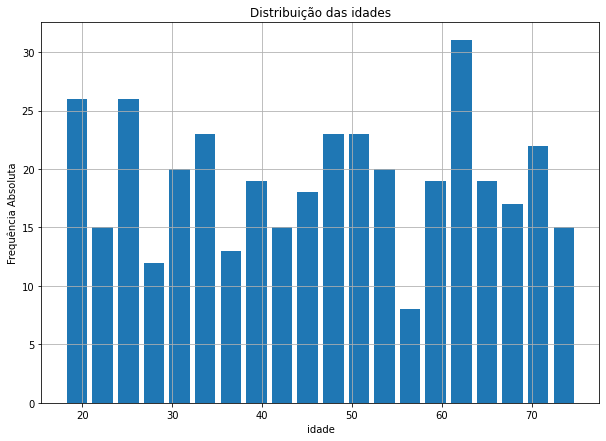

In [48]:
df_histo.hist(column=['idade'], figsize=(10,7), bins=20, rwidth=0.8)
plt.title('Distribuição das idades');  #adiciona o título no gráfico
plt.xlabel('idade');
plt.ylabel('Frequência Absoluta')
plt.show()

Text(0, 0.5, 'Frequência Absoluta')

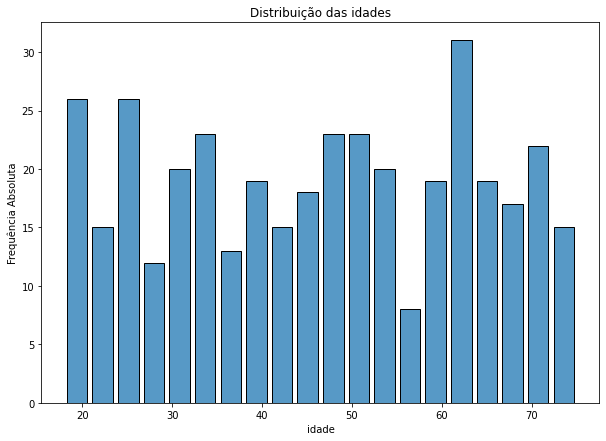

In [49]:
plt.figure(figsize=(10,7))
sns.histplot(x='idade', data=df_histo, bins=20, shrink=.8); # cria o gráfico que conta a quantidade de consumidores existente em cada uma das regiões
plt.title('Distribuição das idades');  #adiciona o título no gráfico
plt.ylabel('Frequência Absoluta')


#Aplicando o método do cotovelo
Vamos iniciar com este método para identificarmos o número de clusters necessários para realizar nossas analises e agrupamentos.

In [50]:
def calcular_wcss(dados_compras_cli):
    wcss = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters = k, random_state=0)
        kmeans.fit(X=dados_compras_cli)        
        wcss.append(kmeans.inertia_)
    return wcss

In [51]:
#type(df_compra_por_cliente)
dados_compras_cli = df_compra_por_cliente[['cod_cliente','idade','sexo','estado_civil','hipertensao','diabetes','nome_estado','classe_produto','valor_total_compra']]

In [52]:
wcss_compras_cli = calcular_wcss(dados_compras_cli[['idade','valor_total_compra']])

In [53]:
type(wcss_compras_cli)

list

In [54]:
# Visualizando os dados obtidos do WCSS
for i in range(len(wcss_compras_cli)):
  print(f'O cluster {i} possui valor de WCSS de: {wcss_compras_cli[i]}')

O cluster 0 possui valor de WCSS de: 3583540.883556106
O cluster 1 possui valor de WCSS de: 1656304.1520220477
O cluster 2 possui valor de WCSS de: 1073795.661085601
O cluster 3 possui valor de WCSS de: 720903.9541714531
O cluster 4 possui valor de WCSS de: 529154.9689690021
O cluster 5 possui valor de WCSS de: 438855.3228525878
O cluster 6 possui valor de WCSS de: 376343.45548262144
O cluster 7 possui valor de WCSS de: 330032.10963479884
O cluster 8 possui valor de WCSS de: 299260.52387577586
O cluster 9 possui valor de WCSS de: 269918.6608828997


In [55]:
import plotly.express as px  #Criação de graficos dinâmnicos
import plotly.offline as py
import plotly.graph_objects as go #Para criação e concatenização de graficos

In [56]:
grafico_wcss = px.line( x= range(1,11),
                        y=wcss_compras_cli
                       )
fig = go.Figure(grafico_wcss)

fig.update_layout(title='Calculando o WCSS',
                  xaxis_title= 'Número de clusters',
                  yaxis_title= 'Valor do Wcss', 
                  template =  'plotly_white'
                  ) 

fig.show()

In [57]:
kmeans_clientes = KMeans(n_clusters=4, random_state=0)
dados_compras_cli['cluster'] = kmeans_clientes.fit_predict(dados_compras_cli[['idade','valor_total_compra']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
dados_compras_cli

,cod_cliente,idade,sexo,estado_civil,hipertensao,diabetes,nome_estado,classe_produto,valor_total_compra,cluster
0,1,26,masculino,divorciado(a),nao hipertenso,diabetico,Minas Gerais,Produtos de Limpeza,17.97,3
1,64,51,masculino,divorciado(a),nao hipertenso,diabetico,Minas Gerais,Hortifruti,7.50,0
2,155,38,feminino,viuvo(a),hipertenso,diabetico,Minas Gerais,Alimentação,8.00,3
3,228,53,masculino,divorciado(a),nao hipertenso,nao diabetico,Minas Gerais,Hortifruti,5.99,0
4,265,18,feminino,solteiro(a),nao hipertenso,nao diabetico,Minas Gerais,Produtos de Limpeza,5.97,3
...,...,...,...,...,...,...,...,...,...,...
2959,2871,23,masculino,divorciado(a),nao hipertenso,diabetico,Pará,Hortifruti,6.00,3
2960,2882,59,masculino,divorciado(a),hipertenso,diabetico,Pará,Alimentação,17.98,0
2961,2944,42,masculino,casado(a),hipertenso,diabetico,Pará,Alimentação,13.80,3
2962,2960,23,feminino,solteiro(a),nao hipertenso,nao diabetico,Pará,Alimentação,3.45,3


In [59]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[ 60.87127976,  12.85463542],
       [ 45.3       , 180.42616667],
       [ 46.73423423,  73.82545045],
       [ 32.0426009 ,  13.67886398]])

In [60]:
grafico = px.scatter(x = dados_compras_cli['idade'], 
    y = dados_compras_cli['valor_total_compra'], 
    color= dados_compras_cli['cluster']
)
grafico_centroide = px.scatter(
    x = centroides_clusters[:,0], 
    y = centroides_clusters[:,1], 
    size = [7,7,7,7]
)

grafico_final = go.Figure(data = grafico.data + grafico_centroide.data)

grafico_final.show()

In [61]:
grafico = px.scatter(x = dados_compras_cli['idade'], 
                     y = dados_compras_cli['valor_total_compra'], 
                     color= dados_compras_cli['cluster'])
fig = go.Figure(grafico)

fig.update_layout(title='Análise de Clusters',
                  xaxis_title= 'idade',
                  yaxis_title= 'Valor total compra',                  
                  ) 
fig.show()

Qual é a desvio padrão dos valores de produtos do dataset de produtos cujaclasse do alimento é Produtos de Limpeza?

In [62]:
df_produtos.query('classe_produto == "Produtos de Limpeza"').describe()

,cod_produto,cod_classe_produto,valor
count,17.000000,17.0,17.000000
mean,1008.000000,1.0,9.121765
std,5.049752,0.0,5.338090
min,1000.000000,1.0,1.250000
25%,1004.000000,1.0,5.990000
50%,1008.000000,1.0,8.990000
75%,1012.000000,1.0,12.000000
max,1016.000000,1.0,22.000000


Qual a proporção de homens e mulheres não hipertensos que compraram
produtos da classe "hortifruti"?

In [63]:
dados_compras_cli.groupby(['classe_produto','sexo'])['hipertensao'].describe()

count unique             top freq
classe_produto      sexo                                       
Alimentação         feminino    511      2  nao hipertenso  257
                    masculino   528      2  nao hipertenso  270
Bebidas             feminino    101      2  nao hipertenso   55
                    masculino    90      2      hipertenso   47
Carnes e Frios      feminino    204      2  nao hipertenso  108
                    masculino   200      2  nao hipertenso  104
Hortifruti          feminino    386      2      hipertenso  193
                    masculino   377      2      hipertenso  191
Produtos de Limpeza feminino    287      2  nao hipertenso  144
                    masculino   280      2      hipertenso  145

In [64]:
count_sexo = dados_compras_cli.query('classe_produto == "Hortifruti" & hipertensao == "nao hipertenso"').count()

In [65]:
dados_compras_cli.query('classe_produto == "Hortifruti" & hipertensao == "nao hipertenso"').groupby('sexo').count() / count_sexo * 100

,classe_produto,cluster,cod_cliente,diabetes,estado_civil,hipertensao,idade,nome_estado,sexo,valor_total_compra
sexo,,,,,,,,,,
feminino,50.923483,50.923483,50.923483,50.923483,50.923483,50.923483,50.923483,50.923483,NaN,50.923483
masculino,49.076517,49.076517,49.076517,49.076517,49.076517,49.076517,49.076517,49.076517,NaN,49.076517


Qual é a classe de produtos possui maior média de compras para as pessoas do
estado de Santa Catarina? Informe a sua respectiva média.

In [66]:
dados_compras_cli.query('valor_total_compra > 0 & nome_estado == "Santa Catarina"').groupby('classe_produto').describe()

cod_cliente                                            \
                          count         mean          std    min      25%   
classe_produto                                                              
Alimentação                36.0  1879.833333   766.703985  397.0  1265.25   
Bebidas                     8.0  1564.000000  1149.466087  224.0   310.00   
Carnes e Frios             13.0  1855.923077   817.705169  803.0   944.00   
Hortifruti                 28.0  1803.642857   871.035919   72.0  1248.00   
Produtos de Limpeza        22.0  1687.909091   820.788582  296.0  1113.50   

                                             idade             ...  \
                        50%      75%     max count       mean  ...   
classe_produto                                                 ...   
Alimentação          1977.5  2561.50  2894.0  36.0  48.583333  ...   
Bebidas              1891.5  2429.50  2983.0   8.0  50.625000  ...   
Carnes e Frios       2086.0  2577.00  2912.0  13.0  47.230769  ...   
Hortifruti           2092.0  2499.00  2987.0  28.0  51.892857  ...   
Produtos de Limpeza  1748.5  2429.25  2985.0  22.0  53.681818  ...   

                    valor_total_compra         cluster                      \
                                   75%     max   count      mean       std   
classe_produto                                                               
Alimentação                    12.7425   29.97    36.0  1.416667  1.518928   
Bebidas                        13.8675   14.97     8.0  0.750000  1.388730   
Carnes e Frios                 59.9800  194.97    13.0  1.923077  1.037749   
Hortifruti                     11.9650   50.00    28.0  1.035714  1.426785   
Produtos de Limpeza            24.0000   54.00    22.0  1.181818  1.468279   

                                               
                     min  25%  50%   75%  max  
classe_produto                                 
Alimentação          0.0  0.0  0.0  3.00  3.0  
Bebidas              0.0  0.0  0.0  0.75  3.0  
Carnes e Frios       0.0  2.0  2.0  3.00  3.0  
Hortifruti           0.0  0.0  0.0  3.00  3.0  
Produtos de Limpeza  0.0  0.0  0.0  3.00  3.0  

[5 rows x 32 columns]

Qual é a quantidade de divorciados e hipertensos estão presentes no cluster 3?

In [67]:
dados_compras_cli.query('cluster == 2 & estado_civil == "divorciado(a)" & hipertensao == "hipertenso"').count()

cod_cliente           21
idade                 21
sexo                  21
estado_civil          21
hipertensao           21
diabetes              21
nome_estado           21
classe_produto        21
valor_total_compra    21
cluster               21
dtype: int64

Qual é o número total de diabéticos para o cluster 1?

In [68]:
dados_compras_cli.query('diabetes == "diabetico"').groupby('cluster').count()

,cod_cliente,idade,sexo,estado_civil,hipertensao,diabetes,nome_estado,classe_produto,valor_total_compra
cluster,,,,,,,,,
0,675,675,675,675,675,675,675,675,675
1,25,25,25,25,25,25,25,25,25
2,120,120,120,120,120,120,120,120,120
3,687,687,687,687,687,687,687,687,687


In [69]:
#dados_compras_cli.to_csv('/content/drive/MyDrive/database/compras_clientes.csv', sep = ';', encoding='latin1') 

#Regras de associação

In [70]:
df_mercado_rg = df_mercado[
    [
        'product_1', 'product_2', 'product_3', 'product_4', 'product_5', 'product_6',
        'product_7', 'product_8', 'product_9', 'product_10', 'product_11', 'product_12',
        'product_13', 'product_14', 'product_15', 'product_16', 'product_17', 'product_18',
        'product_19', 'product_20'
    ]
]

In [71]:
df_mercado_rg

,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9,product_10,product_11,product_12,product_13,product_14,product_15,product_16,product_17,product_18,product_19,product_20
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
lista_compras = []
for i in range(len(df_mercado_rg)):  
    lista_compras.append([str(df_mercado_rg.values[i, j]) for j in range(20)])

In [73]:
lista_compras

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 

Identificado os dados de nosso dataset agora é hora de importa a biblioteca para realizar a analise de regras de associação

In [74]:
from mlxtend.preprocessing import TransactionEncoder

In [75]:
te = TransactionEncoder()
te_array = te.fit(lista_compras).transform(lista_compras)

In [76]:
te_array

array([[False,  True,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

**Criando dataframe com itens do mercado**


Vamos criar o dataframe através da lista criada e infomando as colunas que representam os itens do dataset.

In [77]:
#Neste processo de Transformação definimos o cabeçalho do dataset com o nome dos itens
df_prod_mercado = pd.DataFrame(te_array, columns = te.columns_)

In [78]:
df_prod_mercado

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [79]:
df_prod_mercado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Columns: 121 entries,  asparagus to zucchini
dtypes: bool(121)
memory usage: 886.5 KB


In [80]:
df_prod_mercado['nan']

0       False
1        True
2        True
3        True
4        True
        ...  
7496     True
7497     True
7498     True
7499     True
7500     True
Name: nan, Length: 7501, dtype: bool

Pode-se Obserevar que ao transpor as linhas em colunas os dados, das colunas que possuiam valores ausentes do tipo "Nan" foram incluidas como um produto do mercado. No entanto, isso não é verdadeiro. Dessa forma, vamos eliminar essa coluna do nosso dataframe.

In [81]:
#removendo a coluna nan
df_prod_mercado.drop(columns='nan', inplace=True)

In [82]:
df_prod_mercado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Columns: 120 entries,  asparagus to zucchini
dtypes: bool(120)
memory usage: 879.1 KB


**Gerando os itens frequentes no dataset**


Nesta etapa vamos gerar os itens sets mais frequentes no nosso dataframe. Para isso, vamos utilizar a biblioteca ***apriori***.

In [83]:
#importando a biblioteca Apriori
from mlxtend.frequent_patterns import apriori

Através do algoritmo a priori gere os itens mais frequentes no dataset demercado. Utilize o parâmetro min_support=0.1 e responda: qual a é quantidadede itens frequentes foram criados?

In [84]:
#Selecionando itens aplicando a métrica com o suporte de 10% nesse experimento.
frequent_itemsets = apriori(df_prod_mercado, min_support=0.1, use_colnames=True)

In [85]:
frequent_itemsets

,support,itemsets
0,0.163845,(chocolate)
1,0.179709,(eggs)
2,0.170911,(french fries)
3,0.132116,(green tea)
4,0.129583,(milk)
5,0.238368,(mineral water)
6,0.174110,(spaghetti)


Gere itens frequentes com o suporte mínimo de 0,05 e após utilize o algoritmoassociation_rules, crie as regras de associação considerando metric='confidence'e min_threshold=0.25 e responda: qual regra possui maior confiança?

In [86]:
#Selecionando itens aplicando a métrica com o suporte de 5% nesse experimento.
frequent_itemsets = apriori(df_prod_mercado, min_support=0.05, use_colnames=True)

In [87]:
frequent_itemsets

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


**Criando as regras de associação**


Após a criação dos itens mais frequentes, o proximo passo é criar as regras de associação. Vamos importar a biblioteca association_rules para gerar as regras.

In [88]:
from mlxtend.frequent_patterns import association_rules

In [89]:
#Definindo as regras de associação a serem aplicadas no modelo.
regras = association_rules(frequent_itemsets, metric='confidence',min_threshold=0.25) # 25% regras acontecerem
#visualizando as regras criadas
regras

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
2,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
3,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008


In [90]:
#Selecionando colunas a serem analisadas
regras = regras[['antecedents','consequents', 'support','confidence','lift']]

In [91]:
#Renomeando colunas para melhor interpretação dos dados
regras = regras.rename(
    columns={
        "antecedents": "se",
        "consequents": "então",
        "support": "Suporte", 
        "confidence": "Confiança",
        "lift": "LIFT"
    }
)

In [92]:
#Visuzalizando as alterações
regras

,se,então,Suporte,Confiança,LIFT
0,(chocolate),(mineral water),0.052660,0.321400,1.348332
1,(eggs),(mineral water),0.050927,0.283383,1.188845
2,(spaghetti),(mineral water),0.059725,0.343032,1.439085
3,(mineral water),(spaghetti),0.059725,0.250559,1.439085


In [93]:
#Filtrando as melhores regras baseado no LIFT
regras.sort_values(by = 'LIFT', ascending = False)

,se,então,Suporte,Confiança,LIFT
2,(spaghetti),(mineral water),0.059725,0.343032,1.439085
3,(mineral water),(spaghetti),0.059725,0.250559,1.439085
0,(chocolate),(mineral water),0.052660,0.321400,1.348332
1,(eggs),(mineral water),0.050927,0.283383,1.188845


In [94]:
df_prod_mercado[['eggs','mineral water']].value_counts()

eggs   mineral water
False  False            4747
       True             1406
True   False             966
       True              382
dtype: int64

In [95]:
df_prod_mercado['eggs'].unique()

array([False,  True])